> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
    In this project I'll be analyzing data associated with soccer games, specifically...

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import sqlite3
from xml.etree import ElementTree as ET
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
conn = sqlite3.connect('database.sqlite')

In [3]:
conn = sqlite3.connect('database.sqlite')
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
table_df = {}
for i in range(len(tables['name'])):
    table_df[tables.name[i].lower()] = pd.read_sql("""SELECT * FROM {};""".format(tables.name[i]), conn)
table_df.keys()
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

dict_keys(['sqlite_sequence', 'player_attributes', 'player', 'match', 'league', 'country', 'team', 'team_attributes'])

In [4]:
for key in table_df.keys():
    print('\t', key)
    print(table_df[key].info())

	 sqlite_sequence
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
name    7 non-null object
seq     7 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None
	 player_attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [6]:
match_df = pd.read_sql("""SELECT id AS id, home_team_goal AS home_goals,
                               home_team_api_id AS home_id,
                               away_team_goal AS away_goals,
                               away_team_api_id AS away_id,
                               shoton AS shots_on,
                               shotoff AS shots_off,
                               foulcommit AS fouls_commit,
                               possession
                          FROM "Match";""", conn)

In [7]:
for value, char in zip(('home', 'away'),('h','a')):    # Adds the Overall Rating for every player in the match.
        for i in range(11):
            df = pd.read_sql("""SELECT m.id AS id, p.overall_rating AS {}p{}_rating
            FROM Match m
            JOIN Player_Attributes p
            ON p.player_api_id = m.{}_player_{} AND m.date >= p.date
            GROUP BY m.date;""".format(char, i+1, value, i+1), conn)
            match_df = match_df.merge(df, how='outer')

In [8]:
match_df = match_df.loc[match_df.home_goals != match_df.away_goals]  # Only interested in games with a winner.
match_df.dropna(subset=['home_goals'], inplace=True)
match_df.dropna(subset=['away_goals'], inplace=True)
match_df.dropna(how='all', inplace=True)

In [9]:
match_df.home_goals.isnull().any()

False

In [10]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19383 entries, 2 to 25978
Data columns (total 31 columns):
id              19383 non-null int64
home_goals      19383 non-null int64
home_id         19383 non-null int64
away_goals      19383 non-null int64
away_id         19383 non-null int64
shots_on        10621 non-null object
shots_off       10621 non-null object
fouls_commit    10621 non-null object
possession      10621 non-null object
hp1_rating      1190 non-null float64
hp2_rating      1140 non-null float64
hp3_rating      1177 non-null float64
hp4_rating      1155 non-null float64
hp5_rating      1145 non-null float64
hp6_rating      1130 non-null float64
hp7_rating      1158 non-null float64
hp8_rating      1156 non-null float64
hp9_rating      1175 non-null float64
hp10_rating     1159 non-null float64
hp11_rating     1148 non-null float64
ap1_rating      1190 non-null float64
ap2_rating      1156 non-null float64
ap3_rating      1153 non-null float64
ap4_rating      1166 n

In [11]:
match_df.head()

,id,home_goals,home_id,away_goals,away_id,shots_on,shots_off,fouls_commit,possession,hp1_rating,...,ap2_rating,ap3_rating,ap4_rating,ap5_rating,ap6_rating,ap7_rating,ap8_rating,ap9_rating,ap10_rating,ap11_rating
2,3,0,9984,3,8635,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5,9991,0,9998,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,7947,3,9985,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1,4049,2,9996,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1,10001,0,9986,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def DropUnimportant(df, home):
    columns = ['team_id', 'shots_on', 'shots_off', 'fouls_commit',
       'possession', 'p1_rating', 'p2_rating', 'p3_rating', 'p4_rating',
       'p5_rating', 'p6_rating', 'p7_rating', 'p8_rating', 'p9_rating',
       'p10_rating', 'p11_rating']
    if home:
        df.drop([ 'id', 'home_goals', 'away_goals', 'away_id', 'ap1_rating', 'ap2_rating', 'ap3_rating',
       'ap4_rating', 'ap5_rating', 'ap6_rating', 'ap7_rating', 'ap8_rating',
       'ap9_rating', 'ap10_rating', 'ap11_rating', 'home_win'], axis=1, inplace=True)
        df.columns = columns
    else:
        df.drop([ 'id', 'home_goals', 'away_goals', 'home_id', 'hp1_rating', 'hp2_rating', 'hp3_rating', 'hp4_rating',
       'hp5_rating', 'hp6_rating', 'hp7_rating', 'hp8_rating', 'hp9_rating',
       'hp10_rating', 'hp11_rating', 'home_win'], axis=1, inplace=True)
        df.columns = columns
    return df

In [13]:
match_df['home_win'] = 0
match_df.loc[(match_df.home_goals > match_df.away_goals), 'home_win'] = 1
home_winner_df = match_df[match_df.home_win == 1]
home_loser_df = match_df[match_df.home_win == 0]
away_winner_df = match_df[match_df.home_win == 0]
away_loser_df = match_df[match_df.home_win == 1]

In [14]:
home_winner_df = DropUnimportant(home_winner_df, True)
home_loser_df = DropUnimportant(home_loser_df, True)
away_winner_df = DropUnimportant(away_winner_df, False)
away_loser_df = DropUnimportant(away_loser_df, False)

C:\Users\BeRT2\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
winner_df = pd.concat([home_winner_df, away_winner_df])
loser_df = pd.concat([home_loser_df, away_loser_df])

In [16]:
winner_df.columns

Index(['team_id', 'shots_on', 'shots_off', 'fouls_commit', 'possession',
       'p1_rating', 'p2_rating', 'p3_rating', 'p4_rating', 'p5_rating',
       'p6_rating', 'p7_rating', 'p8_rating', 'p9_rating', 'p10_rating',
       'p11_rating'],
      dtype='object')

In [17]:
both_df = [winner_df, loser_df]

In [18]:
for df in both_df:
    df['avg_overall_rating'] = df.drop(['team_id', 'shots_on', 'shots_off', 'fouls_commit', 'possession'], axis=1).mean(axis=1)
    df.drop(['p1_rating', 'p2_rating', 'p3_rating', 'p4_rating',
       'p5_rating', 'p6_rating', 'p7_rating', 'p8_rating', 'p9_rating',
       'p10_rating', 'p11_rating'], axis=1, inplace=True)

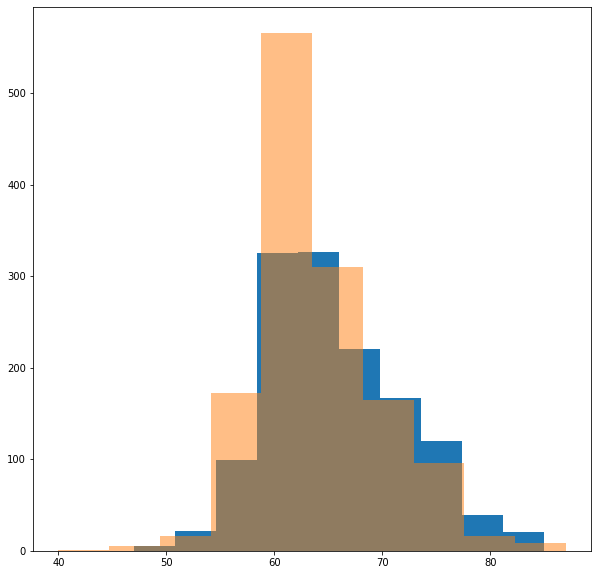

In [45]:
plt.figure(figsize=(10, 10))
plt.hist(winner_df.avg_overall_rating)
plt.hist(loser_df.avg_overall_rating, alpha=0.5)
plt.show();

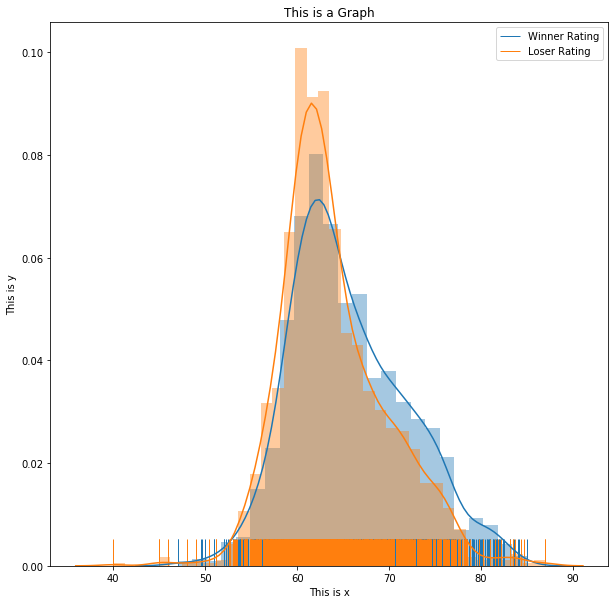

In [64]:
plt.figure(figsize=(10, 10))
sbs.distplot(winner_df.avg_overall_rating.dropna(), rug=True)
sbs.distplot(loser_df.avg_overall_rating.dropna(), rug=True)
plt.legend(labels=['Winner Rating', 'Loser Rating'])
plt.title("This is a Graph")
plt.xlabel("This is x")
plt.ylabel("This is y")
plt.show();

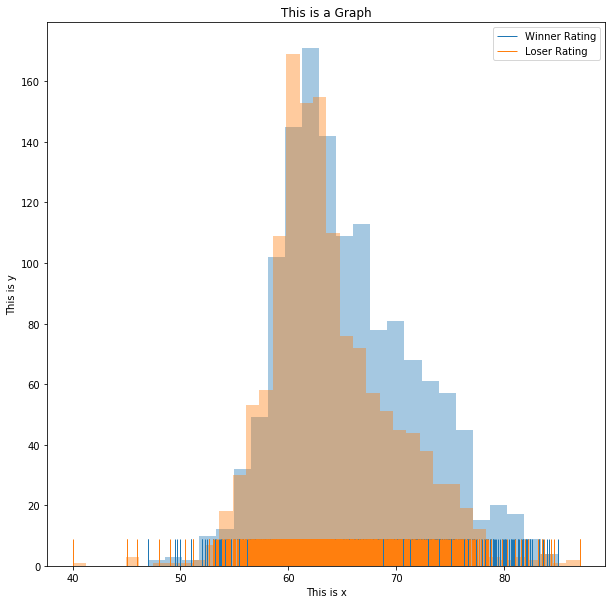

In [65]:
plt.figure(figsize=(10, 10))
sbs.distplot(winner_df.avg_overall_rating.dropna(), kde=False, rug=True)
sbs.distplot(loser_df.avg_overall_rating.dropna(), kde=False, rug=True)
plt.legend(labels=['Winner Rating', 'Loser Rating'])
plt.title("This is a Graph")
plt.xlabel("This is x")
plt.ylabel("This is y")
plt.show();

In [20]:
loser_df.avg_overall_rating.mean()

63.965884216160774

In [21]:
winner_df.avg_overall_rating.mean()

65.64427223770208

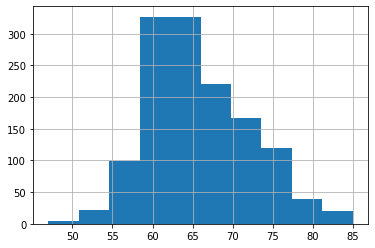

In [22]:
winner_df.avg_overall_rating.hist();

In [23]:
loser_df[loser_df.avg_overall_rating > 0]

,team_id,shots_on,shots_off,fouls_commit,possession,avg_overall_rating
148,9994,None,None,None,None,64.000000
153,9984,None,None,None,None,62.666667
154,9998,None,None,None,None,60.375000
167,8342,None,None,None,None,70.000000
171,8571,None,None,None,None,58.666667
...,...,...,...,...,...,...
25579,10199,None,None,None,None,56.700000
25688,10190,None,None,None,None,56.363636
25764,10190,None,None,None,None,55.818182
25774,10179,None,None,None,None,57.900000


In [24]:
winner_df[winner_df.avg_overall_rating > 0]

,team_id,shots_on,shots_off,fouls_commit,possession,avg_overall_rating
145,8203,None,None,None,None,58.454545
146,9986,None,None,None,None,62.666667
147,9985,None,None,None,None,67.428571
149,8342,None,None,None,None,68.000000
155,8635,None,None,None,None,68.700000
...,...,...,...,...,...,...
25573,10191,None,None,None,None,55.272727
25673,10179,None,None,None,None,58.300000
25778,10190,None,None,None,None,56.400000
25934,9824,<shoton />,<shotoff />,<foulcommit />,<possession />,56.700000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Are certain match attributes correlated with winning or losing?
- Winning/Losing
> - Shots Taken
> - Fouls Committed
> - Average Possession

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2: Does having an higher average overall player rating correlate with winning?
- Winning/Losing
> - Team-wide overall rating average.

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!